In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('C:\\Users\\phnf2\\Desktop\\LaboLeiteCsv\\bovinocultura.CSV')
data

,BatchId,Sequence,Date,SampleID,Fat,Tru.Pro.,Tot.Pro.,Casein,Solids,SNF,FPD,Urea
0,bovinocultura,1,10/25/2017,NaN,3.09,2.49,2.64,2.04,10.90,7.80,255.19,11.54
1,bovinocultura,1,10/25/2017,NaN,3.11,2.50,2.66,2.05,10.95,7.84,256.66,11.08
2,bovinocultura,2,10/25/2017,NaN,3.56,2.08,2.21,1.69,10.80,7.24,241.37,11.69
3,bovinocultura,2,10/25/2017,NaN,3.67,2.12,2.25,1.72,11.09,7.42,252.19,12.08
4,bovinocultura,3,10/25/2017,NaN,4.73,2.97,3.15,2.45,12.54,7.81,252.80,15.85
5,bovinocultura,3,10/25/2017,NaN,4.74,2.98,3.16,2.45,12.55,7.81,252.93,15.92
6,bovinocultura,4,10/25/2017,NaN,3.15,2.51,2.67,2.06,11.13,7.98,265.45,18.58
7,bovinocultura,4,10/25/2017,NaN,3.14,2.52,2.67,2.06,11.13,8.00,266.20,18.58
8,bovinocultura,5,10/25/2017,NaN,3.55,2.19,2.33,1.79,10.45,6.89,217.87,18.91
9,bovinocultura,5,10/25/2017,NaN,3.56,2.20,2.33,1.79,10.46,6.90,218.16,19.18


In [3]:
q = ['normal','normal','normal','normal','alta','alta','normal','normal','normal','normal','baixa','baixa','alta','alta','baixa','baixa','normal','normal','baixa','baixa']
data['Qualidade'] = q
data

,BatchId,Sequence,Date,SampleID,Fat,Tru.Pro.,Tot.Pro.,Casein,Solids,SNF,FPD,Urea,Qualidade
0,bovinocultura,1,10/25/2017,NaN,3.09,2.49,2.64,2.04,10.90,7.80,255.19,11.54,normal
1,bovinocultura,1,10/25/2017,NaN,3.11,2.50,2.66,2.05,10.95,7.84,256.66,11.08,normal
2,bovinocultura,2,10/25/2017,NaN,3.56,2.08,2.21,1.69,10.80,7.24,241.37,11.69,normal
3,bovinocultura,2,10/25/2017,NaN,3.67,2.12,2.25,1.72,11.09,7.42,252.19,12.08,normal
4,bovinocultura,3,10/25/2017,NaN,4.73,2.97,3.15,2.45,12.54,7.81,252.80,15.85,alta
5,bovinocultura,3,10/25/2017,NaN,4.74,2.98,3.16,2.45,12.55,7.81,252.93,15.92,alta
6,bovinocultura,4,10/25/2017,NaN,3.15,2.51,2.67,2.06,11.13,7.98,265.45,18.58,normal
7,bovinocultura,4,10/25/2017,NaN,3.14,2.52,2.67,2.06,11.13,8.00,266.20,18.58,normal
8,bovinocultura,5,10/25/2017,NaN,3.55,2.19,2.33,1.79,10.45,6.89,217.87,18.91,normal
9,bovinocultura,5,10/25/2017,NaN,3.56,2.20,2.33,1.79,10.46,6.90,218.16,19.18,normal


In [4]:
le = preprocessing.LabelEncoder()
qualidade = le.fit_transform(data['Qualidade'])
qualidade

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1],
      dtype=int64)

In [5]:
data['Qualidade'] = qualidade
data

,BatchId,Sequence,Date,SampleID,Fat,Tru.Pro.,Tot.Pro.,Casein,Solids,SNF,FPD,Urea,Qualidade
0,bovinocultura,1,10/25/2017,NaN,3.09,2.49,2.64,2.04,10.90,7.80,255.19,11.54,2
1,bovinocultura,1,10/25/2017,NaN,3.11,2.50,2.66,2.05,10.95,7.84,256.66,11.08,2
2,bovinocultura,2,10/25/2017,NaN,3.56,2.08,2.21,1.69,10.80,7.24,241.37,11.69,2
3,bovinocultura,2,10/25/2017,NaN,3.67,2.12,2.25,1.72,11.09,7.42,252.19,12.08,2
4,bovinocultura,3,10/25/2017,NaN,4.73,2.97,3.15,2.45,12.54,7.81,252.80,15.85,0
5,bovinocultura,3,10/25/2017,NaN,4.74,2.98,3.16,2.45,12.55,7.81,252.93,15.92,0
6,bovinocultura,4,10/25/2017,NaN,3.15,2.51,2.67,2.06,11.13,7.98,265.45,18.58,2
7,bovinocultura,4,10/25/2017,NaN,3.14,2.52,2.67,2.06,11.13,8.00,266.20,18.58,2
8,bovinocultura,5,10/25/2017,NaN,3.55,2.19,2.33,1.79,10.45,6.89,217.87,18.91,2
9,bovinocultura,5,10/25/2017,NaN,3.56,2.20,2.33,1.79,10.46,6.90,218.16,19.18,2


In [6]:
data = data.drop(['Date','BatchId'],axis=1)


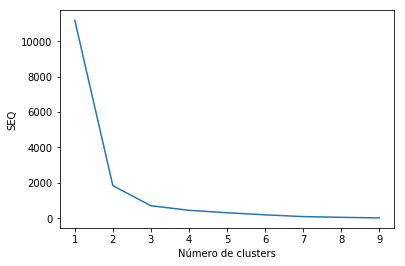

In [7]:
data.fillna(value=0, inplace=True)
seq = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    seq[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(seq.keys()), list(seq.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SEQ")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Qualidade'], test_size=0.33)

In [9]:
#Classsificador Svm --> Acuracia = 0.7142857142857143
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acuracia = metrics.accuracy_score(predictions, y_test)
print(acuracia)

0.7142857142857143


In [10]:
#Classificador MLP
param_grid = {
    'hidden_layer_sizes': [(16,16), (16,2), (30,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [500, 1000, 5000],
    'momentum': [0.5, 0.8, 0.9], 
}

grid = GridSearchCV(MLPClassifier(),param_grid, verbose = 3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.4, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.4, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, h

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_la

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_l

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs, score=0.3333333333333333, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_la

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16),

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_siz

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.4, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_la

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logisti

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.8, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidde

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16

[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_la

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidd

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.4, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.8, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic,

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.4, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.4, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.8, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=1.0, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.4, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), le

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2)

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), le

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.8, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidde

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidde

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.4, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.8, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=1.0, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.4, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.8, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=1.0, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_s

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs, score=0.4, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam, score=1.0, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs, score=0.2, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learni

[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.3333333333333333, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learni

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), l

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), lear

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_size

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_r

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rat

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=co

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(3

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learni

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), l

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_si

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(3

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.3333333333333333, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_size

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), l

[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(30,), learning_rat

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.4, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), le

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learnin

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learni

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=constant,

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16)

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_ra

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), lea

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16)

[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 16), lear

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.4, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=consta

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.4, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=consta

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.4, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), lea

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=c

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_ra

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.8, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adapti

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.8, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), lear

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=1.0, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), l

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=1.0, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=1.0, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), l

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, le

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.4, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adapti

[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(16, 2), learning_ra

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constan

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=c

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam, score=0.8, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.3333333333333333, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_ra

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=constant, lea

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.8, solver=adam, score=1.0, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_r

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_ra

[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_in

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=con

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_ra

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant,

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), 

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=500, momentum=0.9, solver=adam, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, 

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=constant, learning_rate_init=0.1, max_iter=5000, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), lear

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), lear

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, lea

[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adaptive, learning_rate_init=0.1, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 16), learning_rate=adapt

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learn

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), 

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam 


C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.3333333333333333, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2),

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.001, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2),

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.4, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learn

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learn

C:\Users\phnf2\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2),

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learn

[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(16, 2), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(16, 2), learning_ra

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=const

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, lea

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rat

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learning_rate_init=0.1, max_iter=1000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=constant, learn

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.5, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adapt

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, max_iter=5000, momentum=0.5, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=a

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=500, momentum=0.9, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs, score=0.8, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1000, momentum=0.5, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adapti

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.2, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.8, solver=adam, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=5000, momentum=0.9, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive,

[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=1.0, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=lbfgs, score=0.6666666666666666, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam, score=0.4, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000, momentum=0.8, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, lea

[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(16, 16), (16, 2), (30,)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam'], 'learning_rate_init': [0.001, 0.01, 0.1], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [500, 1000, 5000], 'momentum': [0.5, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [11]:
predict = grid.predict(X_test)                           
print('Accuracy_score: ', metrics.accuracy_score(y_test, predict))
grid.best_params_

Accuracy_score:  0.7142857142857143


{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.1,
 'max_iter': 500,
 'momentum': 0.9,
 'solver': 'lbfgs'}

In [12]:
print('MAE: ', metrics.mean_absolute_error(y_test, predict))           
print('MSE: ', metrics.mean_squared_error(y_test, predict))           
print('SME', np.sqrt(metrics.mean_absolute_error(y_test, predict)))

MAE:  0.2857142857142857
MSE:  0.2857142857142857
SME 0.5345224838248488
